In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("NFLX.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [6]:
df.shape

(5044, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [9]:
df = df.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
df.set_index('Date',inplace=True)
df.head(10)


,Adj Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-28,1.157143
2002-05-29,1.103571
2002-05-30,1.071429
2002-05-31,1.076429
2002-06-03,1.128571
2002-06-04,1.117857
2002-06-05,1.147143


<AxesSubplot:xlabel='Date'>

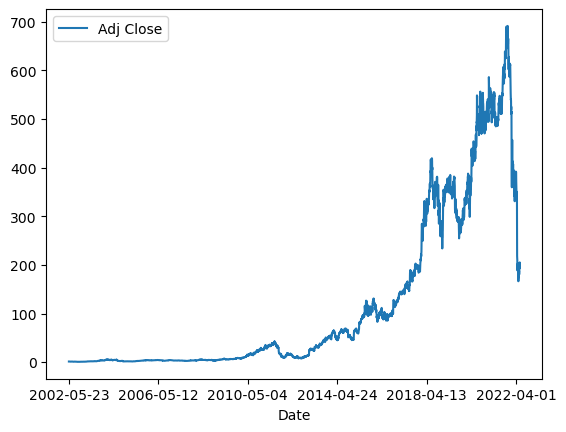

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('Weak evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')

In [13]:
adfuller_test(df['Adj Close'])

ADF Test Statistic: -1.2470207311260366
p-value: 0.6530488146407212
Weak evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


In [14]:
df1=df-df.shift(1)
df1 = df1.dropna()

In [15]:
adfuller_test(df1['Adj Close'])

ADF Test Statistic: -10.662460987641246
p-value: 4.37165931689719e-19
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


<AxesSubplot:xlabel='Date'>

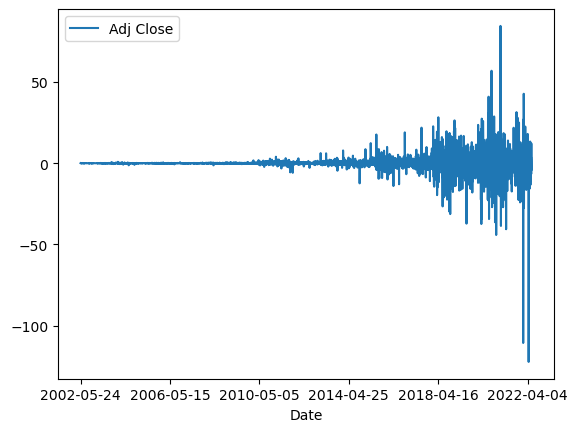

In [16]:
df1.plot()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

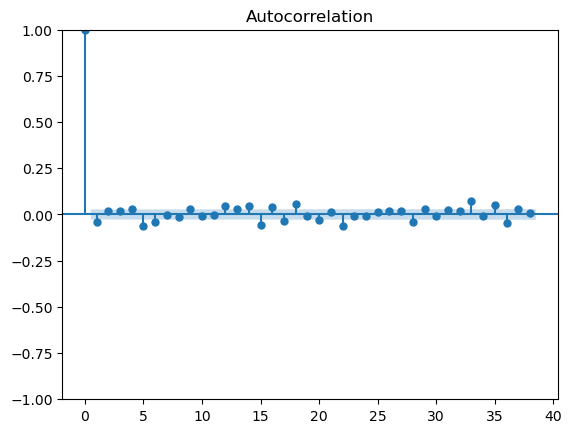

In [18]:
plot_acf(df1['Adj Close']);

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


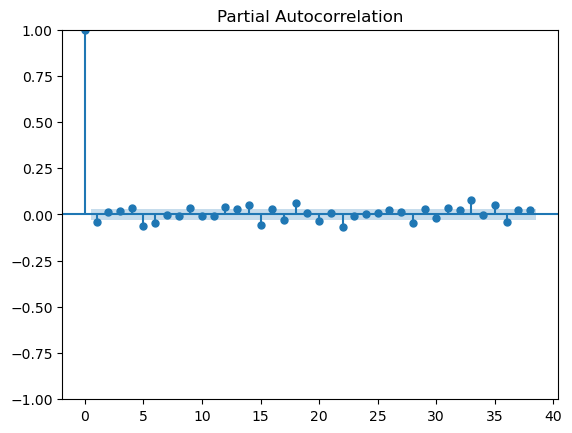

In [19]:
plot_pacf(df1['Adj Close']);

(p,d,q)=(1,1,1)

In [20]:

import statsmodels.api as sm

In [21]:
model = sm.tsa.statespace.SARIMAX(df['Adj Close'], seasonal_order=(1,1,1,30), simple_differencing=False)
res = model.fit(disp=False)
print(res.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                 5044
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 30)   Log Likelihood              -15744.551
Date:                              Thu, 18 May 2023   AIC                          31497.102
Time:                                      12:19:20   BIC                          31523.182
Sample:                                           0   HQIC                         31506.241
                                             - 5044                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.000   2935.525      0.000       0.998       1.000
ar.S.L30      -0.03

In [22]:
df1.tail(10)

,Adj Close
Date,
2022-05-20,2.870010
2022-05-23,1.089996
2022-05-24,-7.100006
2022-05-25,7.490006
2022-05-26,3.569992
2022-05-27,3.790008
2022-05-31,2.250000
2022-06-01,-4.529998
2022-06-02,12.179992


In [23]:
start_date = "2022-01-03"
end_date = "2022-06-03"

In [24]:
df['forecast'] = res.predict(start = start_date, end = end_date)

<AxesSubplot:xlabel='Date'>

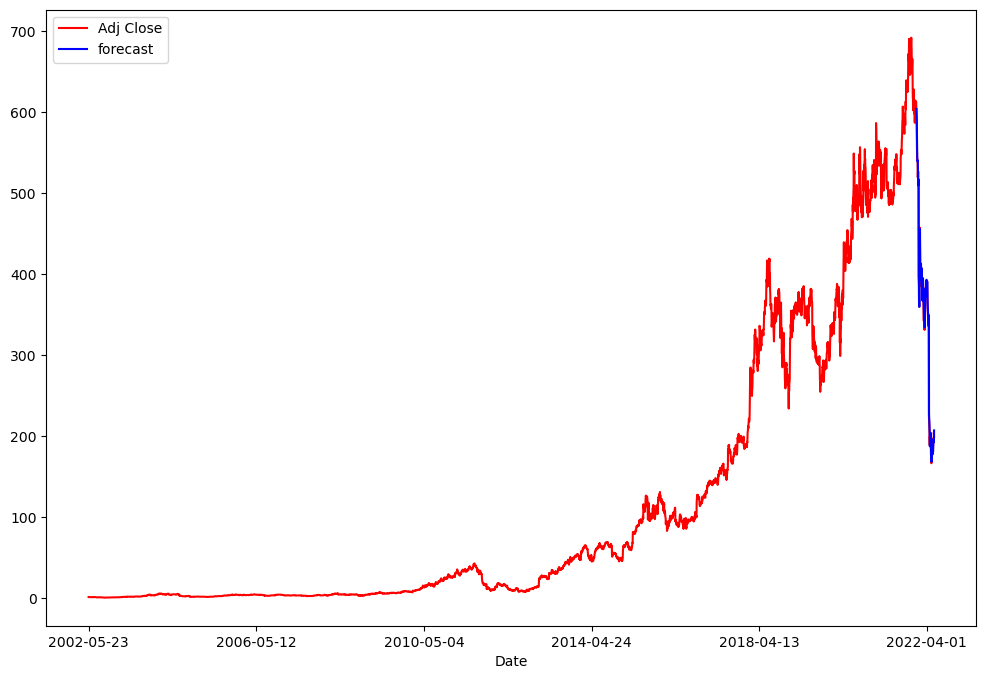

In [25]:

df[['Adj Close','forecast']].plot(figsize=(12,8),color=('red','blue'))